## Taller #2 del 2020-02-22

**Juan Fernando Medina Escarraga**  
**Maestria en Analitica de Datos**  
**Universidad Central**  

**1.** Realizar el ACP de Delitos, con los porcentajes.

> **a)** Presentar los valores propios y analizarlos.  
> **b)** Presentar la ecuacion de los 2 primeros componentes.  
> **c)** Construir un indice con el primer componente y explicarlo.  
> **d)** Presentar el grafico factorial 1 y 2 y explicarlo.

---
### Preparacion de datos ###

In [1]:
#Carga archivo origen de datos
df <- read.csv2(file = 'Delitos_Colombia.csv', encoding = "UTF-8")

#Muestra de los datos
head(df, n = 5)

,Departamento,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,Antioquia,2163,375,5079,11897,8205,6690977
2,Atlantico,1042,85,1928,59,3659,2546138
3,Bogota_D.C.,4211,1463,725,2725,19811,8181047
4,Bolivar,944,28,922,3812,2085,2171558
5,Boyaca,517,95,1167,4084,2707,1281979


In [2]:
#convierte la primera columna en indice
df <- data.frame(df[,-1], row.names = df[,1])

#Muestra de los datos
head(df, n = 5)

,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion
,<int>,<int>,<int>,<int>,<int>,<int>
Antioquia,2163,375,5079,11897,8205,6690977
Atlantico,1042,85,1928,59,3659,2546138
Bogota_D.C.,4211,1463,725,2725,19811,8181047
Bolivar,944,28,922,3812,2085,2171558
Boyaca,517,95,1167,4084,2707,1281979


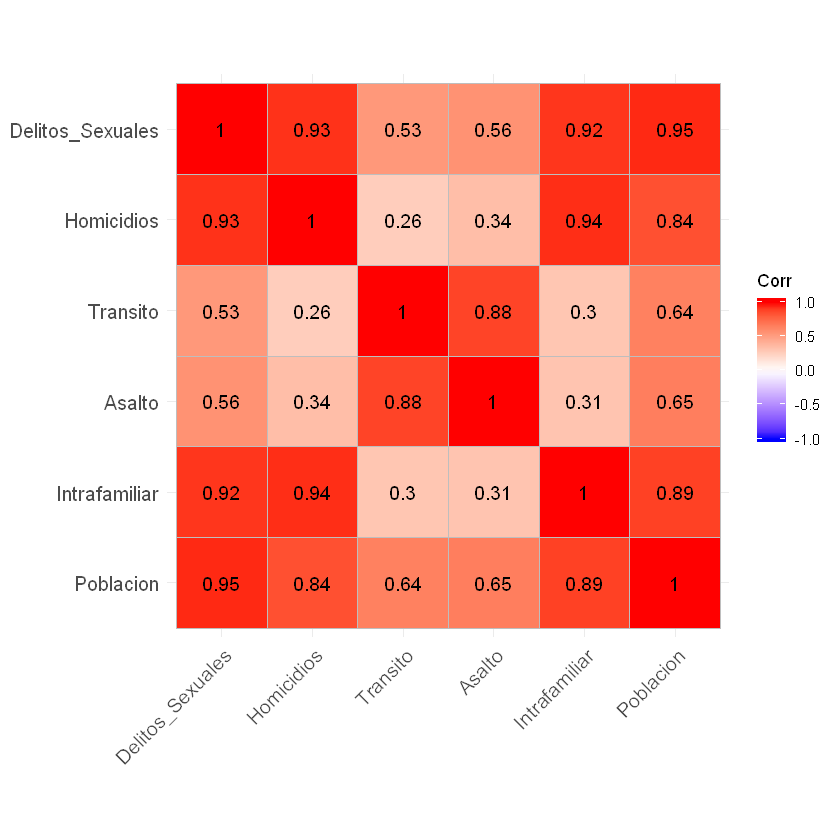

In [3]:
#Representacion grafica de la matriz de correlacion
library('ggplot2')
library('ggcorrplot')
corr.mat = cor(df)
ggcorrplot(corr.mat[, ncol(df):1], lab = TRUE)

In [4]:
#Calcula la suma de delitos por Departamento
df$TotalDelitosDepto = rowSums (df[ , 1:5])

#head(df, n = 5)

#Calcula el porcentaje de cada delito por Departamento
df$'DelitosSexuales%' = df$Delitos_Sexuales/df$TotalDelitosDepto
df$'Homicidios%' = df$Homicidios/df$TotalDelitosDepto
df$'Transito%' = df$Transito/df$TotalDelitosDepto
df$'Asalto%' = df$Asalto/df$TotalDelitosDepto
df$'Intrafamiliar%' = df$Intrafamiliar/df$TotalDelitosDepto

head(df, n = 5)

,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion,TotalDelitosDepto,DelitosSexuales%,Homicidios%,Transito%,Asalto%,Intrafamiliar%
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Antioquia,2163,375,5079,11897,8205,6690977,27719,0.07803312,0.01352863,0.18323172,0.429200188,0.2960063
Atlantico,1042,85,1928,59,3659,2546138,6773,0.15384615,0.01254983,0.28465968,0.008711059,0.5402333
Bogota_D.C.,4211,1463,725,2725,19811,8181047,28935,0.14553309,0.05056160,0.02505616,0.094176603,0.6846725
Bolivar,944,28,922,3812,2085,2171558,7791,0.12116545,0.00359389,0.11834168,0.489282505,0.2676165
Boyaca,517,95,1167,4084,2707,1281979,8570,0.06032672,0.01108518,0.13617270,0.476546091,0.3158693


In [5]:
#Calcula el porcentaje de cada delito por Departamento
#df$'DelitosSexuales%' = df$Delitos_Sexuales/df$Poblacion
#df$'Homicidios%' = df$Homicidios/df$Poblacion
#df$'Transito%' = df$Transito/df$Poblacion
#df$'Asalto%' = df$Asalto/df$Poblacion
#df$'Intrafamiliar%' = df$Intrafamiliar/df$Poblacion

#head(df, n = 5)

#Genera dataframe solo con las columnas que se necesitan para realizar el analisis
#df2 = df[ , 5:11]
#df2 = df2[ , -1]
#df2 = df2[ , -1]
#head(df2, n=5)

In [6]:
#Genera dataframe solo con las columnas que se necesitan para realizar el analisis
df2 = df[ , 6:12]
df2 = df2[ , -1]
df2 = df2[ , -1]
head(df2, n=5)

,DelitosSexuales%,Homicidios%,Transito%,Asalto%,Intrafamiliar%
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Antioquia,0.07803312,0.01352863,0.18323172,0.429200188,0.2960063
Atlantico,0.15384615,0.01254983,0.28465968,0.008711059,0.5402333
Bogota_D.C.,0.14553309,0.05056160,0.02505616,0.094176603,0.6846725
Bolivar,0.12116545,0.00359389,0.11834168,0.489282505,0.2676165
Boyaca,0.06032672,0.01108518,0.13617270,0.476546091,0.3158693


---

### Presentar los valores propios y analizarlos.  ### 

In [7]:
#Generar reporte de importancia de los componentes
df2.pca = prcomp(df2, center = TRUE, scale. = TRUE)
summary(df2.pca)

Importance of components:
                          PC1    PC2    PC3    PC4       PC5
Standard deviation     1.4708 1.1133 0.9992 0.7739 2.819e-16
Proportion of Variance 0.4326 0.2479 0.1997 0.1198 0.000e+00
Cumulative Proportion  0.4326 0.6805 0.8802 1.0000 1.000e+00

In [8]:
#Generacion de los valores propios
print('Los valores propios del ACP son: \n')
df2.pca$sdev^2

[1] "Los valores propios del ACP son: \n"


[1] 2.163205e+00 1.239491e+00 9.983215e-01 5.989822e-01 7.945322e-32

**Los valores propios indican la varianza de los componentes principales, para el caso del ejercicio entre las 3 primeras componentes se explica el 88% de la variacion de los datos y si se tienen en cuenta las 4 primeras componentes se explica el 100%.**

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



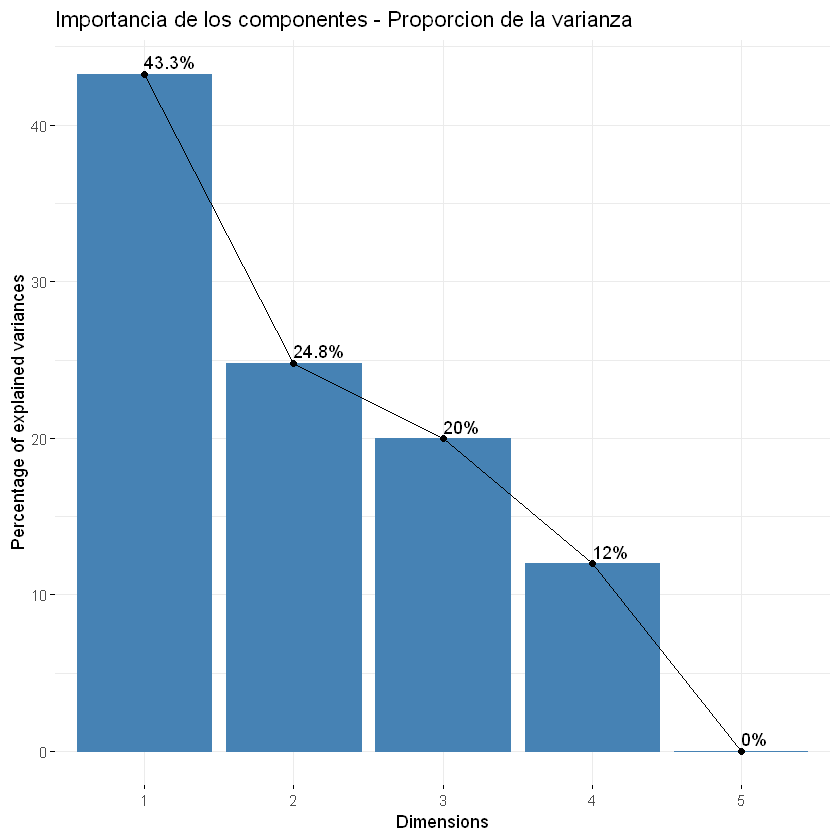

In [9]:
#Aporte de cada componente
#barplot(summary(df.pca)$importance[2,], main="Aporte de cada componente", xlab="Componente")
library('factoextra')
fviz_eig(df2.pca, addlabels = TRUE, main = "Importancia de los componentes - Proporcion de la varianza")

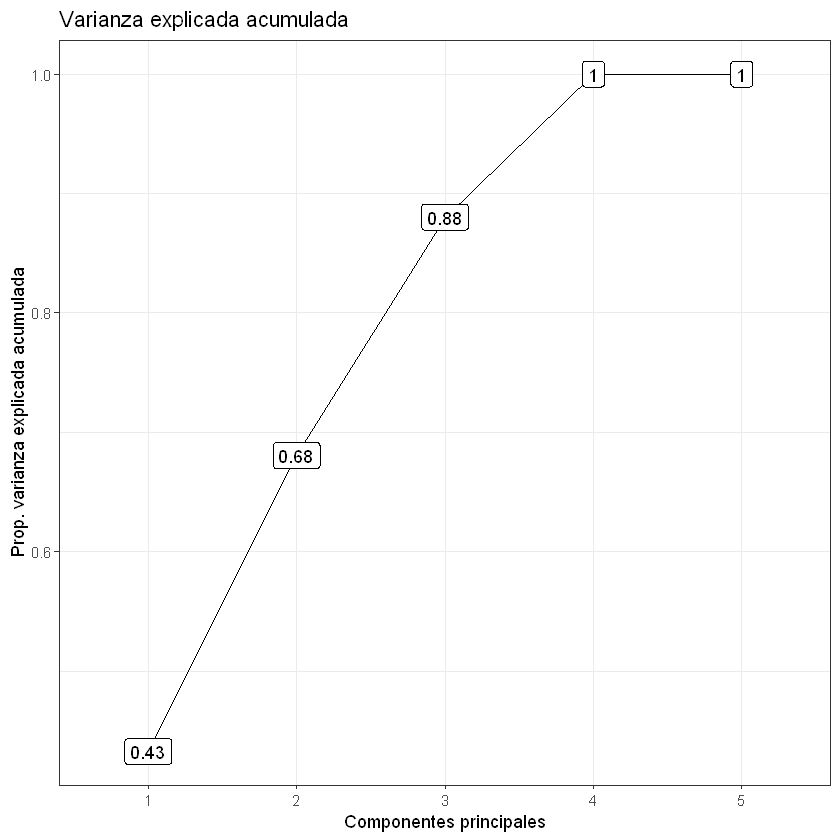

In [10]:
# Varianza explicada acumulada 
prop_varianza <- df2.pca$sdev^2/sum(df2.pca$sdev^2)
prop_varianza_acum <- cumsum(prop_varianza)
ggplot(data = data.frame(prop_varianza_acum, pc = factor(1:ncol(df2))), aes(x = pc, y = prop_varianza_acum, group = 1)) +
  geom_point() +
  geom_line() +
  geom_label(aes(label = round(prop_varianza_acum,2))) +
  theme_bw() +
  labs(x = "Componentes principales", y = "Prop. varianza explicada acumulada") + 
  ggtitle("Varianza explicada acumulada")

---

### Presentar la ecuacion de los 2 primeros componentes. ###  

In [11]:
#Matriz de Eigen
df2.pca$rotation

,PC1,PC2,PC3,PC4,PC5
DelitosSexuales%,0.3300791,-0.59083723,0.27547022,0.65357980,-0.19725300
Homicidios%,0.3568988,-0.56237208,0.07114757,-0.73931985,-0.06859351
Transito%,-0.3548571,-0.34804196,-0.75917152,0.05898418,-0.41608014
Asalto%,-0.5519041,-0.01011897,0.57288544,-0.14911283,-0.58725390
Intrafamiliar%,0.5771909,0.46196690,-0.12047846,-0.02293120,-0.66211507


Al analizar la matriz de eigen, se evidencia que la primer componente esta conformada por la siguiente combinacion de las variables originales:

\begin{equation}
PC1 = 0.330 DelitosSexuales\% + 0.356 Homicidios\% - 0.354 Transito\% - 0.551 Asalto\% + 0.577 Intrafamiliar\%
\end{equation}
  
  
Por otra parte la ecuacion de la segunda componente es:  
  
\begin{equation}
PC2 = - 0.590 DelitosSexuales\% - 0.562 Homicidios\% - 0.348 Transito\% - 0.010 Asalto\% + 0.461 Intrafamiliar\%
\end{equation}

---

### Construir un indice con el primer componente y explicarlo  ###

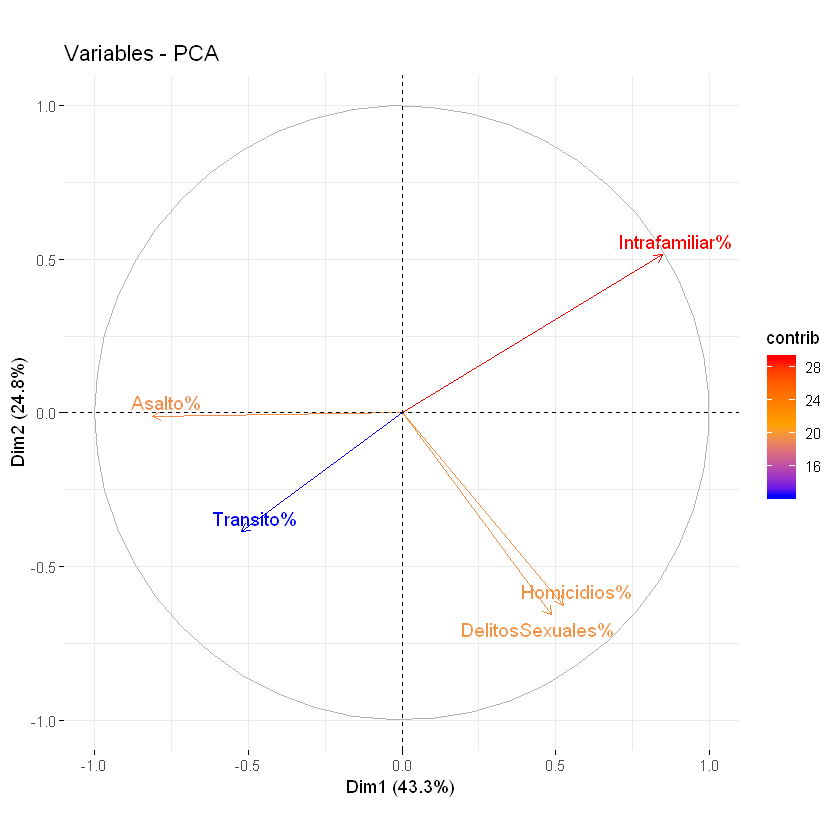

In [12]:
fviz_pca_var(df2.pca, axes = c(1,2), 
             col.var = "contrib", # Color por contribucion a la componente principal
             gradient.cols = c("blue", "orange", "red"),
             repel = TRUE     # Evita la superposicion de texto
             )

In [13]:
PC1 = df2.pca$x[,1]
PC1

Antioquia          Atlantico        Bogota_D.C.            Bolivar 
       -0.23738484         2.91990805         5.13257567        -0.26382151 
            Boyaca             Caldas            Caqueta              Cauca 
       -0.38161426        -0.96986068         0.71619140        -0.36497945 
             Cesar            Cordoba       Cundinamarca              Choco 
       -0.54830271        -0.83225097        -1.98691780         0.02777198 
             Huila         La_Guajira          Magdalena               Meta 
       -0.64712308         0.24897460        -0.41585661         0.14469984 
            Nariño Norte_de_Santander            Quindio          Risaralda 
       -1.70943322        -0.52616590        -0.79793681        -0.85226141 
         Santander              Sucre             Tolima    Valle_del_Cauca 
       -2.20037388         0.10208059        -1.26072554        -0.74738359 
            Arauca           Casanare           Putumayo         San_Andres 
        1.22422472         0.32453272         0.37657533        -1.39649336 
          Amazonas            Guainia           Guaviare             Vaupes 
        0.68207347         2.29700852         1.47812983         1.57114354 
           Vichada 
       -1.10700463

In [14]:
PC1 = PC1-min(PC1)+1
PC1

Antioquia          Atlantico        Bogota_D.C.            Bolivar 
          2.962989           6.120282           8.332950           2.936552 
            Boyaca             Caldas            Caqueta              Cauca 
          2.818760           2.230513           3.916565           2.835394 
             Cesar            Cordoba       Cundinamarca              Choco 
          2.652071           2.368123           1.213456           3.228146 
             Huila         La_Guajira          Magdalena               Meta 
          2.553251           3.449348           2.784517           3.345074 
            Nariño Norte_de_Santander            Quindio          Risaralda 
          1.490941           2.674208           2.402437           2.348112 
         Santander              Sucre             Tolima    Valle_del_Cauca 
          1.000000           3.302454           1.939648           2.452990 
            Arauca           Casanare           Putumayo         San_Andres 
          4.424599           3.524907           3.576949           1.803881 
          Amazonas            Guainia           Guaviare             Vaupes 
          3.882447           5.497382           4.678504           4.771517 
           Vichada 
          2.093369

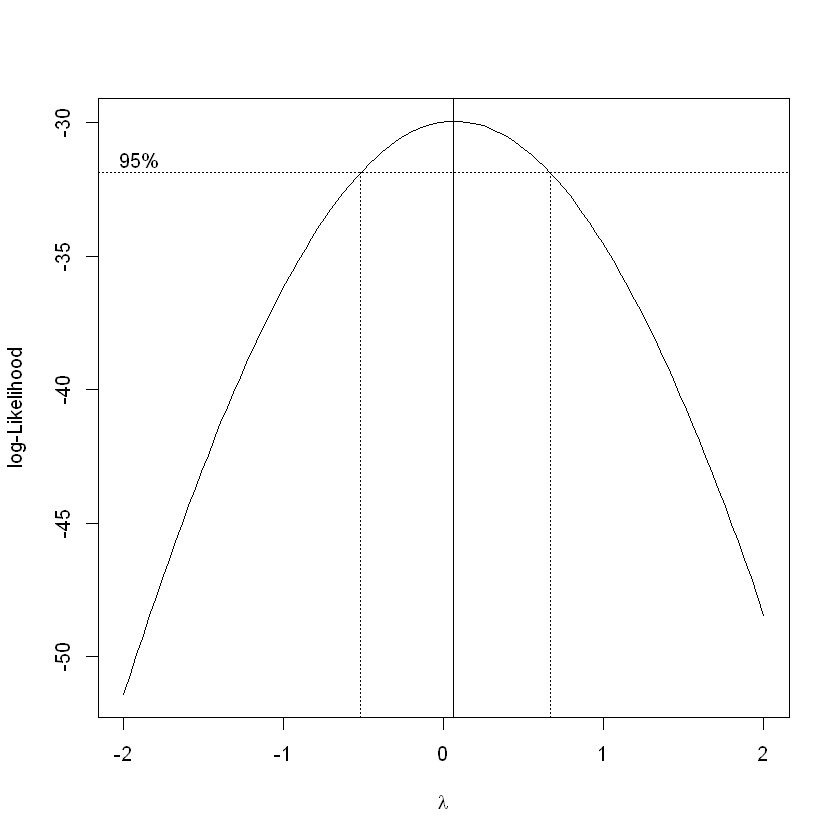

In [15]:
#Suavizar
library('MASS')
x = boxcox(lm(PC1 ~ 1))
posicion = which.max(x$y) #Devuelve la posicion del maximo valor de y
valor = x$x[posicion] #Devuelve el valor de x para el maximo valor de y
#valor
abline(v = valor)

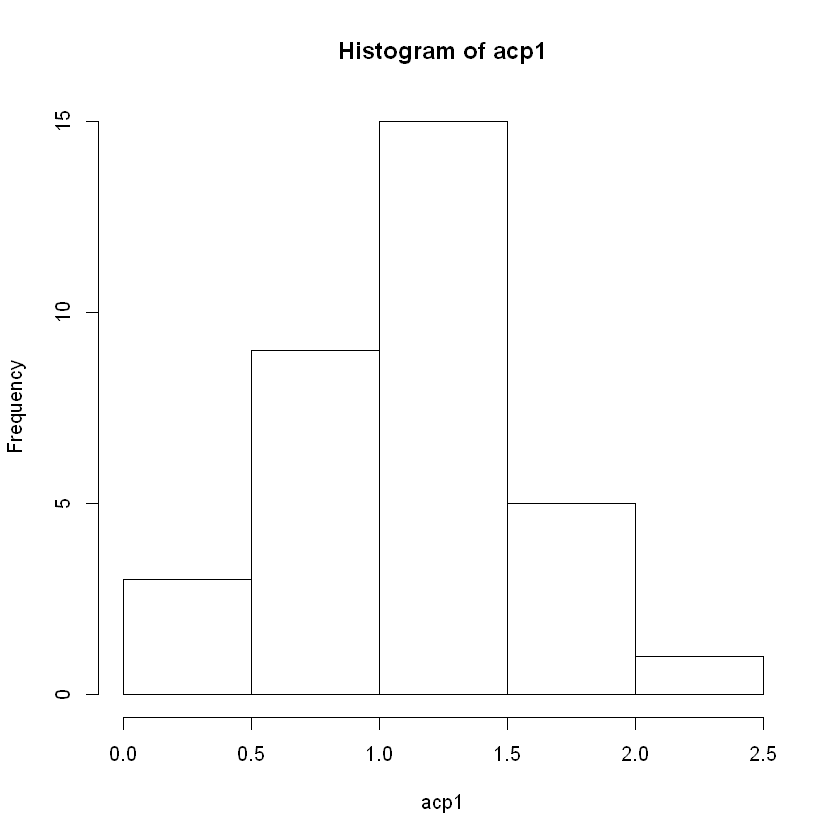

In [16]:
#BOXCOX lambda 0.5
acp1 = (PC1^valor-1)/(valor)
hist(acp1)

In [17]:
a = min(PC1)
a

[1] 1

In [18]:
b = max(PC1)
b

[1] 8.33295

In [19]:
m = 100/(b-a)
m

[1] 13.63708

In [20]:
n = -m*a
n

[1] -13.63708

In [21]:
Indice = data.frame(Indice=m*PC1+n, Depto = df[0])
Indice

,Indice
,<dbl>
Antioquia,26.769433
Atlantico,69.825681
Bogota_D.C.,100.000000
Bolivar,26.408914
Boyaca,24.802566
Caldas,16.780604
Caqueta,39.773426
Cauca,25.029416
Cesar,22.529422


De acuerdo al indice calculado, se puede concluir que Santander y Bogota representan los dos extremos opuestos de la primer componente, donde Bogota es quien mas casos de violencia intrafamiliar, homicidios y delitos sexuales y Santander presenta muy pocos proporcionalmente a la poblacion.

---

### Presentar el grafico factorial 1 y 2 y explicarlo. ###  

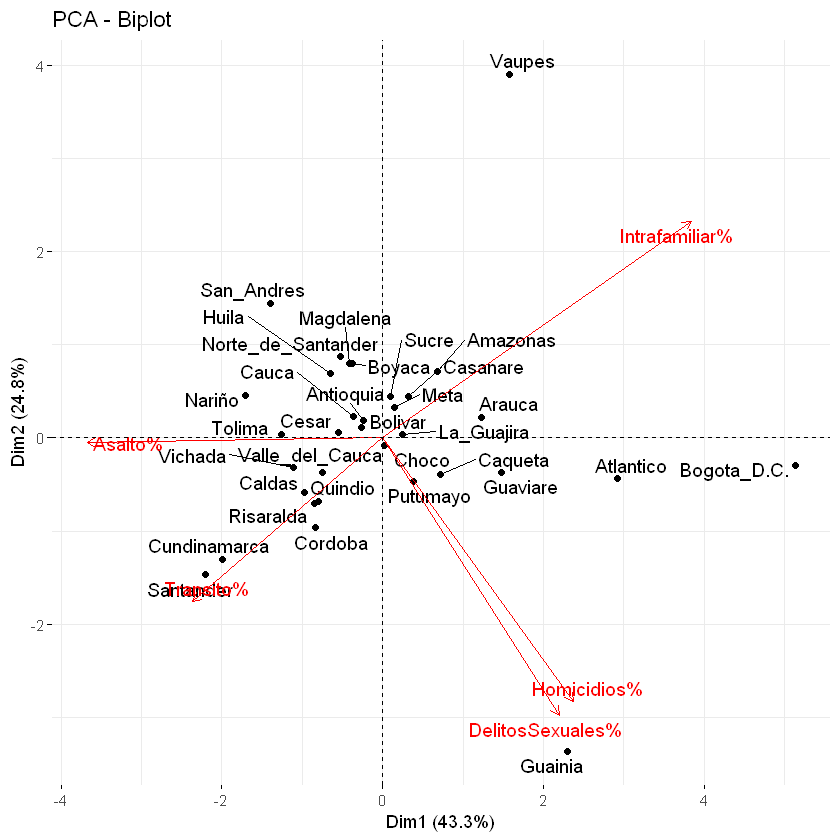

In [22]:
fviz_pca_biplot(df2.pca, repel = TRUE,
                col.var = "red", # Color de las variables
                col.ind = "black"  # Color de los individuos
                )

En consonancia a lo indicado en el numeral anterior se evidencia que Santander presenta un alto numero de casos de Asalto y Transito, mientras que Bogota presenta alto numero de casos de de violencia intrafamiliar, homicidios y delitos sexuales proporcionalmente respecto a la poblacion. Se identifica a Vaupes como un dato atipico.

---